<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_62_Decision_Trees_Hyperparameters_Overfitting_Underfitting/Lecture_62_dtreeviz_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
# Install the dtreeviz library
# !pip install dtreeviz

In [156]:
# Import the graphviz backend
import graphviz.backend as be

In [71]:
from sklearn.datasets import *
from dtreeviz.trees import *
import dtreeviz
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from sklearn import tree
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [186]:
# Define and train a Decision Tree Classifier using the Iris dataset
clas = tree.DecisionTreeClassifier() # Initialize the classifier
iris = load_iris() # Load the Iris dataset

X_train = iris.data # Features
y_train = iris.target # Target variable

clas.fit(X_train, y_train) # Train the classifier

DecisionTreeClassifier()

In [187]:
# Display the trained classifier object
clas

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

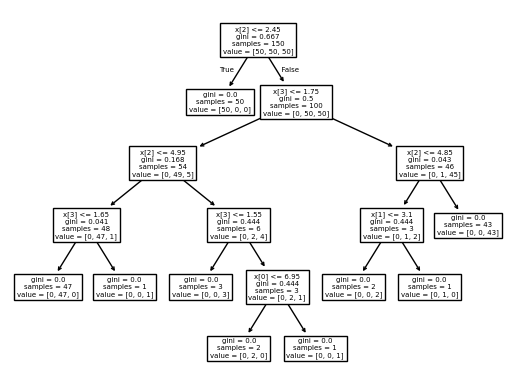

In [188]:
# Visualize the decision tree using plot_tree from scikit-learn
from sklearn.tree import plot_tree
plot_tree(clas)

# **1. Classification**

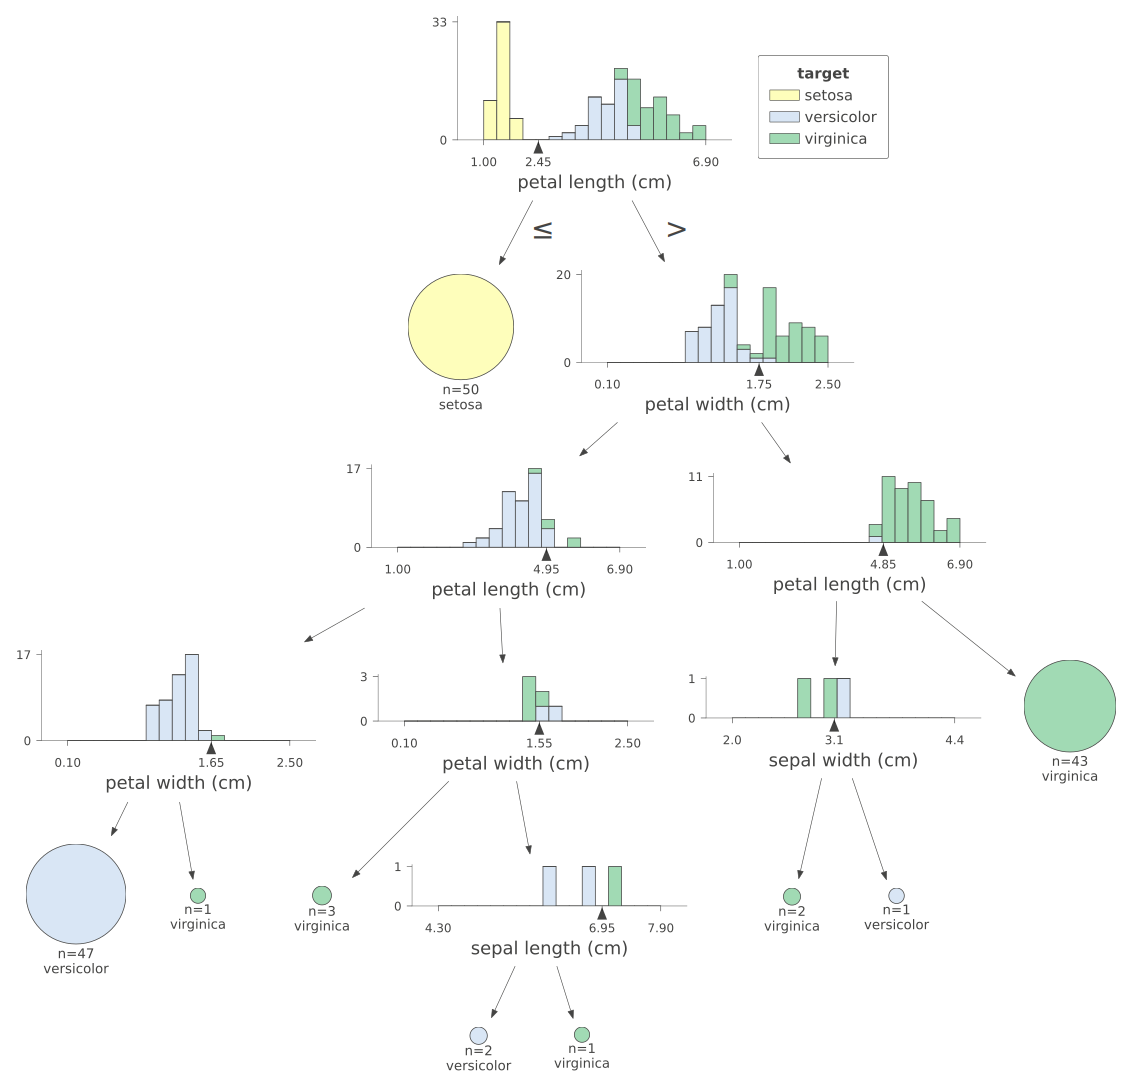

In [189]:
# Create a dtreeviz model object for the classification tree
m = dtreeviz.model(clas,
                   X_train,
                   y_train,
                   target_name='target',
                   feature_names=iris.feature_names,
                   class_names=list(iris.target_names))

# Visualize the classification tree using dtreeviz
viz = m.view(scale=2,fontname='DejaVu Sans')
viz

# **2. Regression**

In [190]:
# Initialize a Decision Tree Regressor
regr = tree.DecisionTreeRegressor(max_depth=2)

# Original code to load Boston Housing data from scikit-learn (commented out)
# boston = load_boston()
# X_train = boston.data
# y_train = boston.target

In [191]:
# Load the Boston Housing dataset from a URL into a pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
display(df.head()) # Display the first few rows of the DataFrame

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [192]:
# Separate features (X) and target variable (y) from the DataFrame
X = df.iloc[:,0:13]  # All columns except the last one are features
y = df.iloc[:,13]   # The last column ('medv') is the target variable

In [193]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
# Train the Decision Tree Regressor on the training data
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

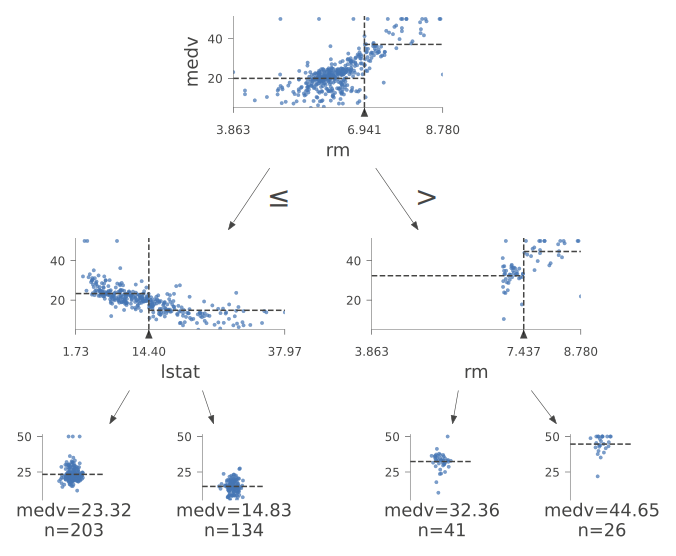

In [195]:
# Create a dtreeviz model object for the regression tree
viz_1 = dtreeviz.model(regr,
                   X_train,
                   y_train,
                   target_name='medv',
                   feature_names=df.columns,
                   class_names=None)

# Visualize the regression tree using dtreeviz with a specified font name
viz_1 = viz_1.view(scale=2, fontname='DejaVu Sans')
viz_1

# **3. Horizontal Decision Tree**

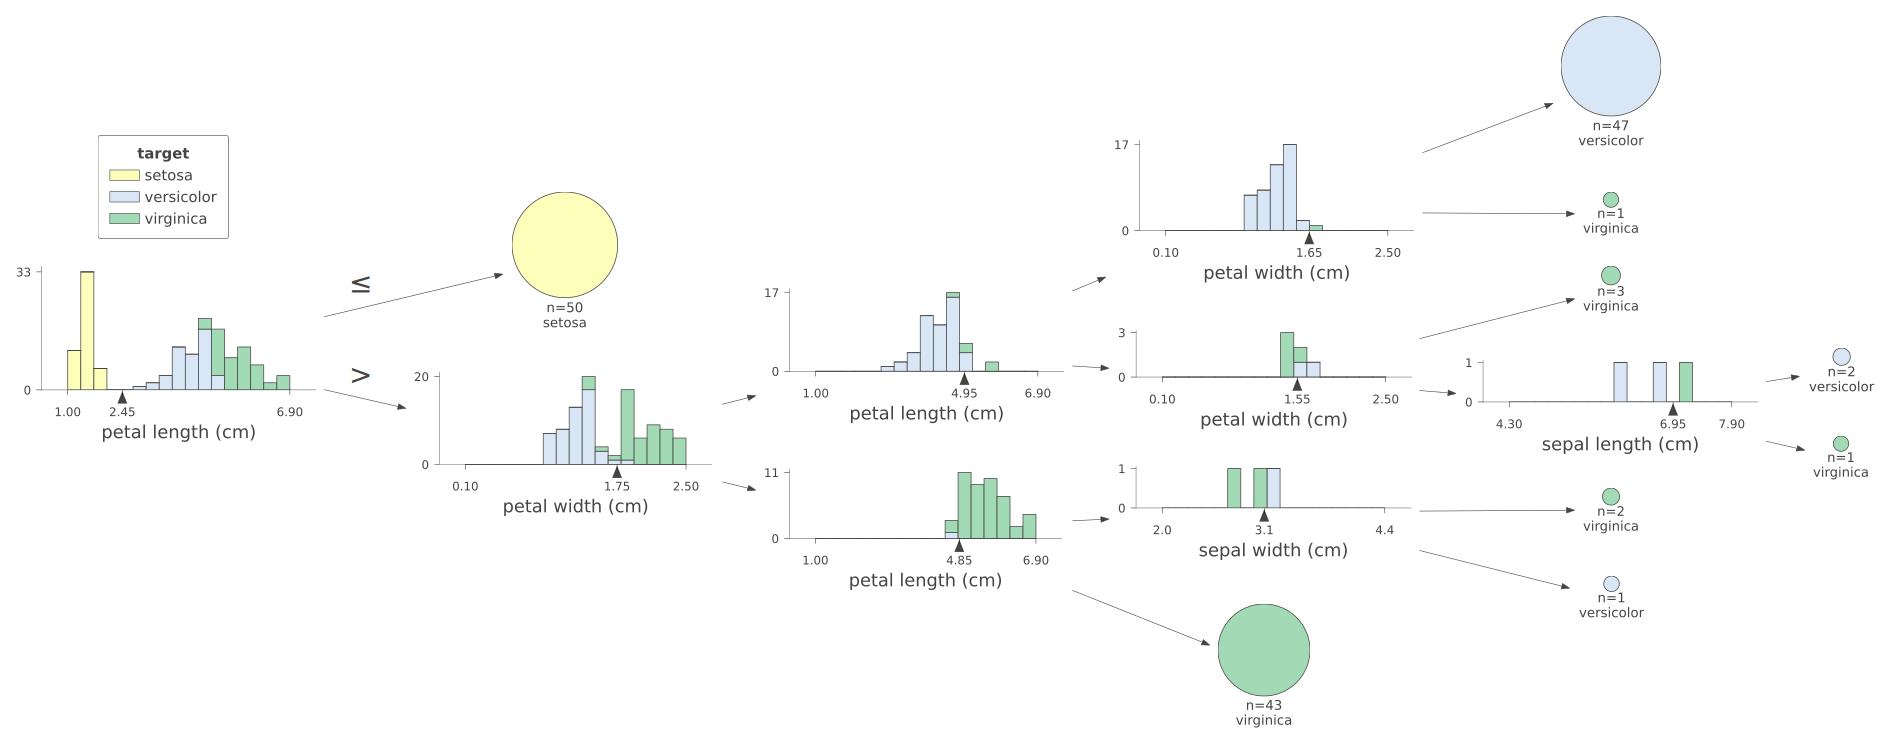

In [182]:
# Create a dtreeviz model object for the classification tree
m_2 = dtreeviz.model(clas,
                   X_train,
                   y_train,
                   target_name='target',
                   feature_names=iris.feature_names,
                   class_names=list(iris.target_names))

# Visualize the classification tree with horizontal orientation
viz_2 = m_2.view(orientation='LR',scale=2,fontname='DejaVu Sans')
viz_2

# **4. Show Prediction path**

In [196]:
# Re-initialize a Decision Tree Classifier
clas = tree.DecisionTreeClassifier()

In [197]:
# Load the Iris dataset again
iris = load_iris()

In [198]:
# Prepare training data and train the classifier
X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

DecisionTreeClassifier()

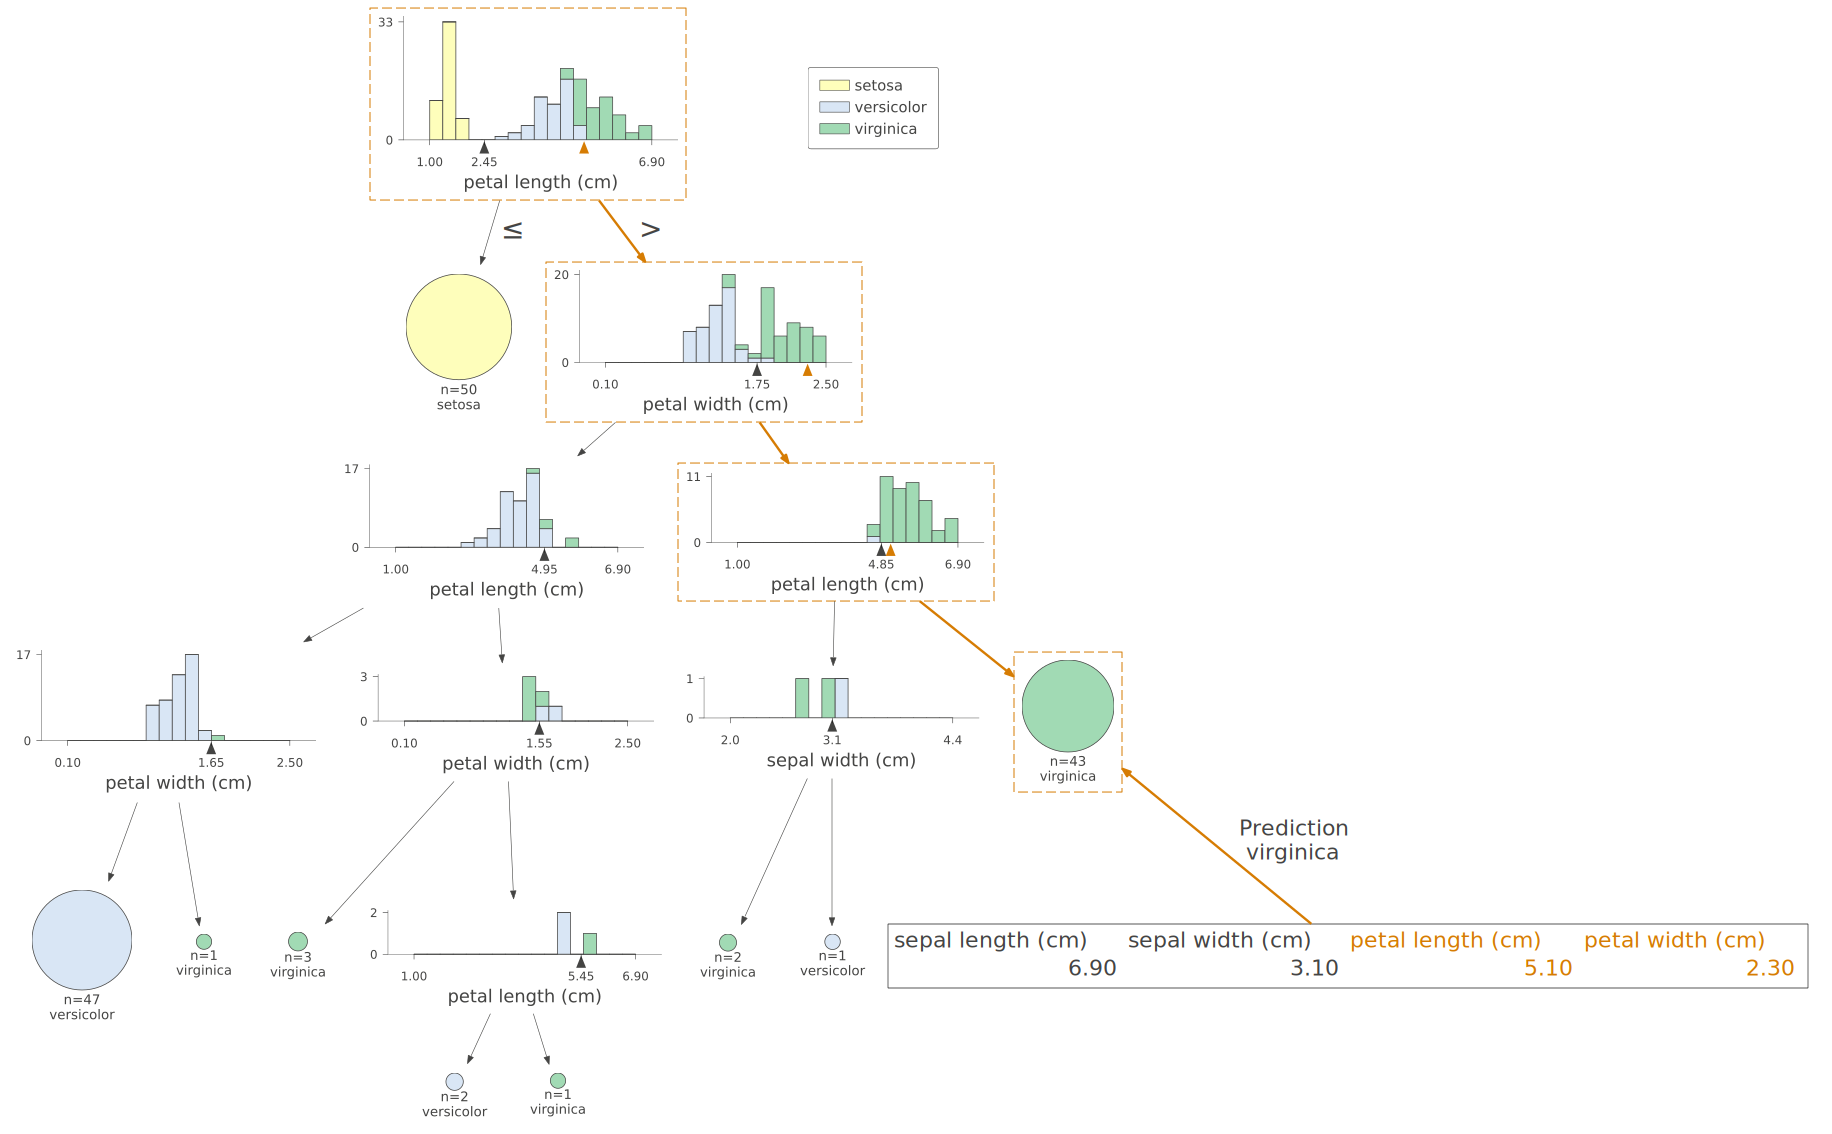

In [199]:
# Select a single instance for highlighting the prediction path
X_instance = iris.data[np.random.randint(0, len(iris.data)),:]
m_3 = dtreeviz.model(clas,
                    X_train,
                    y_train,
                    feature_names=iris.feature_names,
                    class_names=list(iris.target_names))

# Visualize the tree and highlight the prediction path for X_instance
viz_3 = m_3.view(x=X_instance,scale=2,fontname='DejaVu Sans')
viz_3

In [200]:
# Display the selected single instance
X_instance

array([6.9, 3.1, 5.1, 2.3])

# **5.Show node Number**

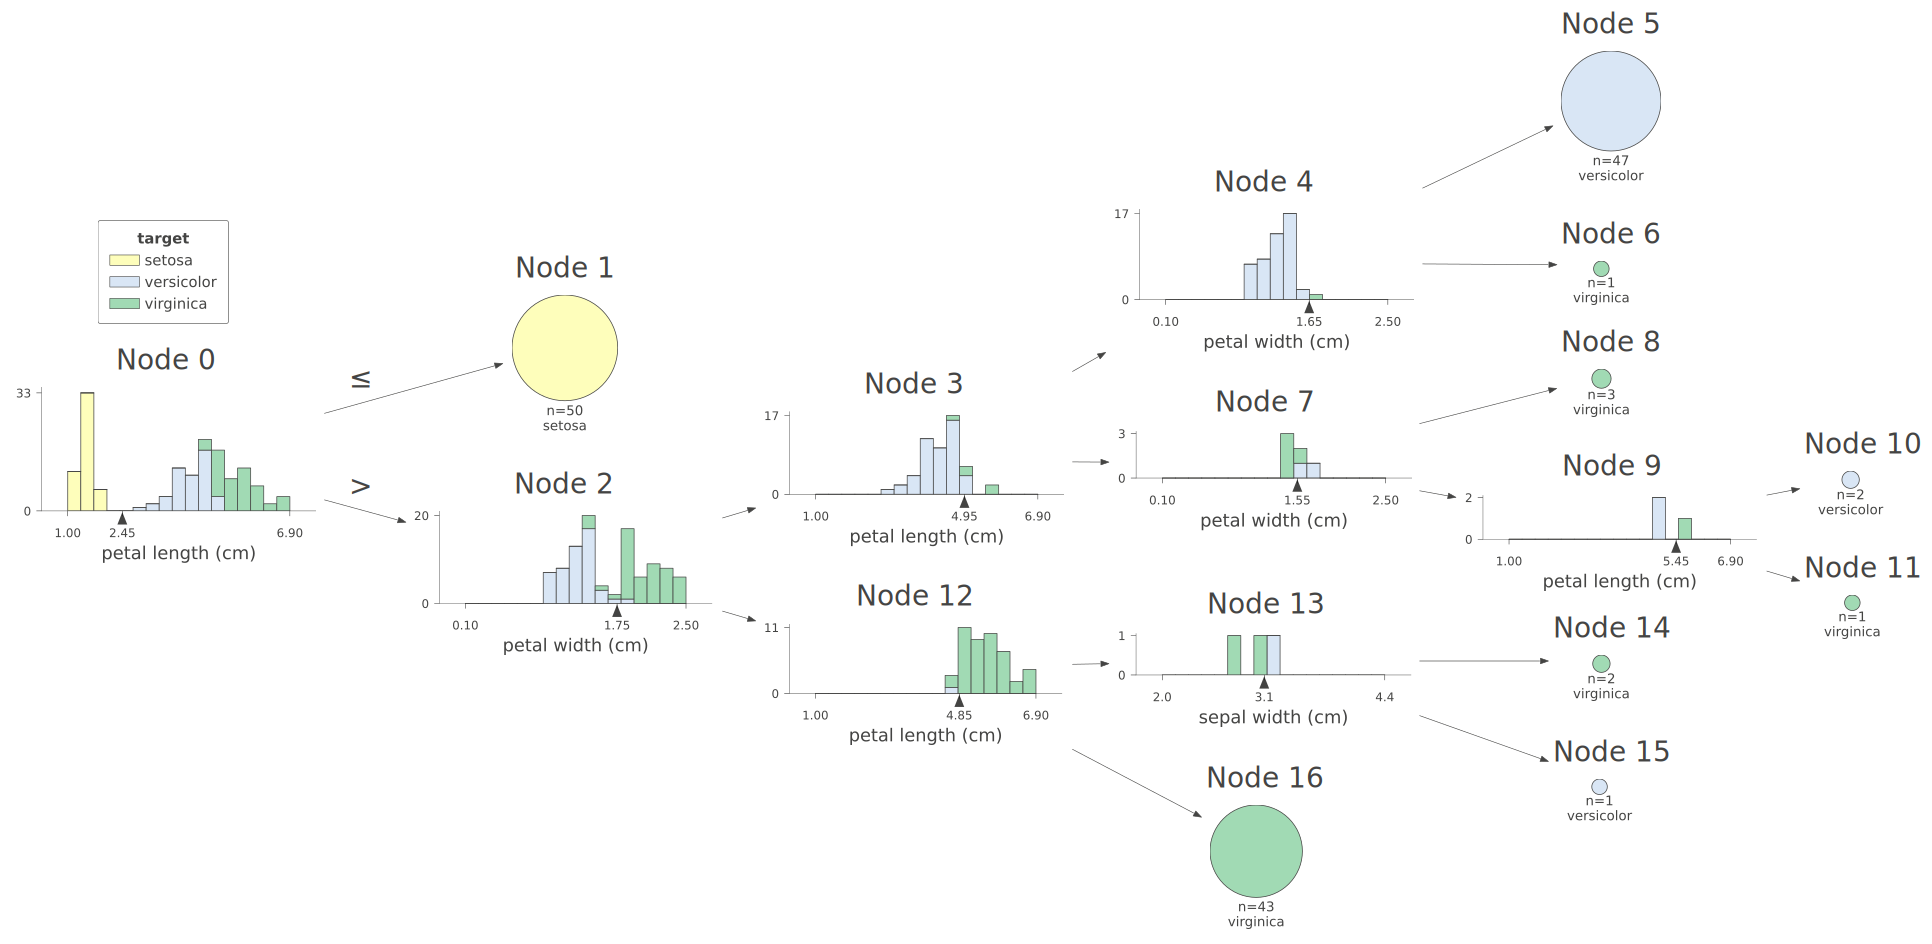

In [201]:
# Create a dtreeviz model object for the classification tree
m_4 = dtreeviz.model(clas,
                   X_train,
                   y_train,
                   target_name='target',
                   feature_names=iris.feature_names,
                   class_names=list(iris.target_names))

# Visualize the tree with horizontal orientation and show node labels
viz_4 = m_4.view(orientation='LR', show_node_labels=True, histtype='barstacked', scale=2,fontname='DejaVu Sans')
viz_4

# **6.Without Any Graphs**

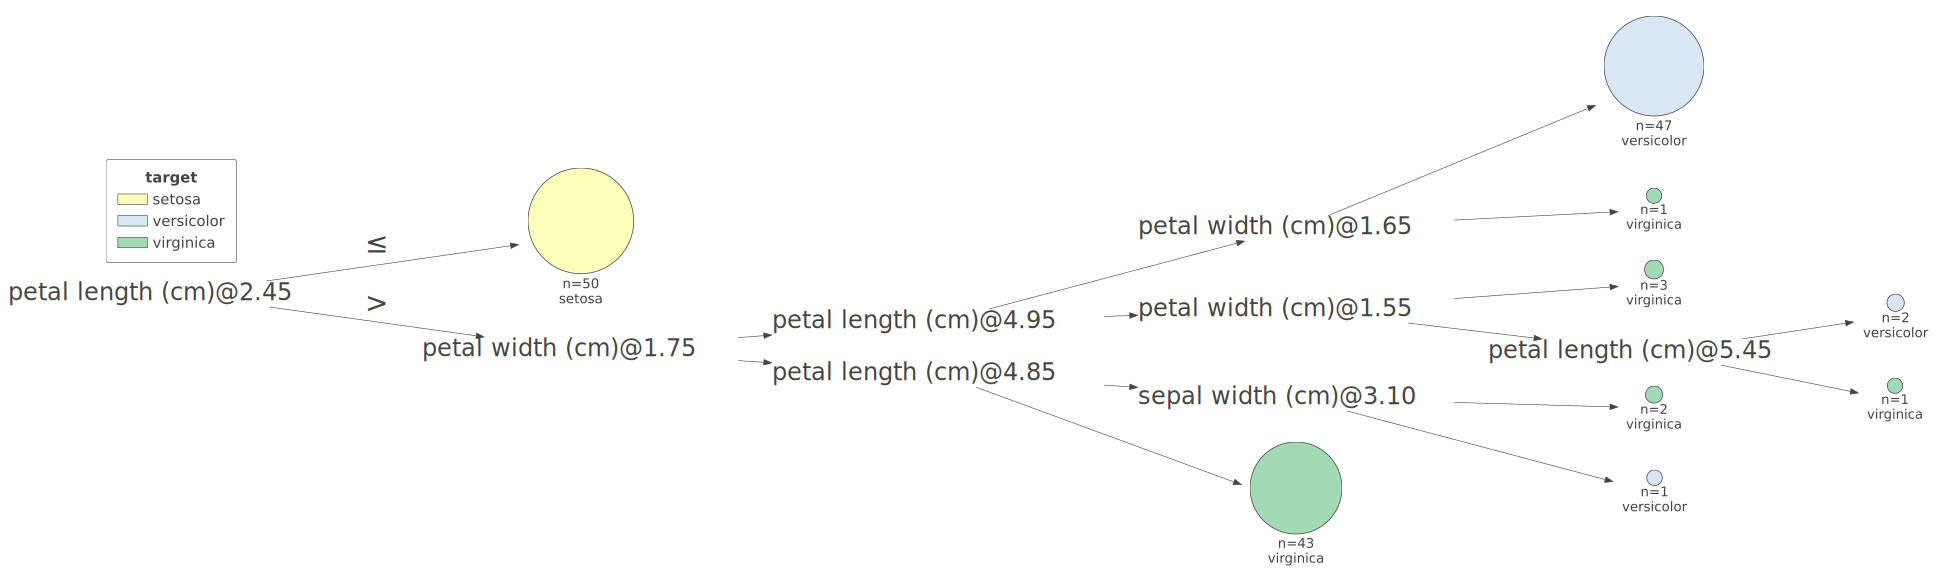

In [202]:
# Create a dtreeviz model object for the classification tree
m_5 = dtreeviz.model(clas,
                   X_train,
                   y_train,
                   target_name='target',
                   feature_names=iris.feature_names,
                   class_names=list(iris.target_names))

# Visualize the tree with horizontal orientation and simplified style (no graphs)
viz_5 = m_5.view(orientation='LR', show_node_labels=False, histtype='barstacked', fancy=False, scale=2,fontname='DejaVu Sans')
viz_5

# **7.Show just Prediction path nothing else**

In [203]:
# Re-initialize classifier, load data, and train for prediction path explanation
clas = tree.DecisionTreeClassifier()
iris = load_iris()
X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

DecisionTreeClassifier()

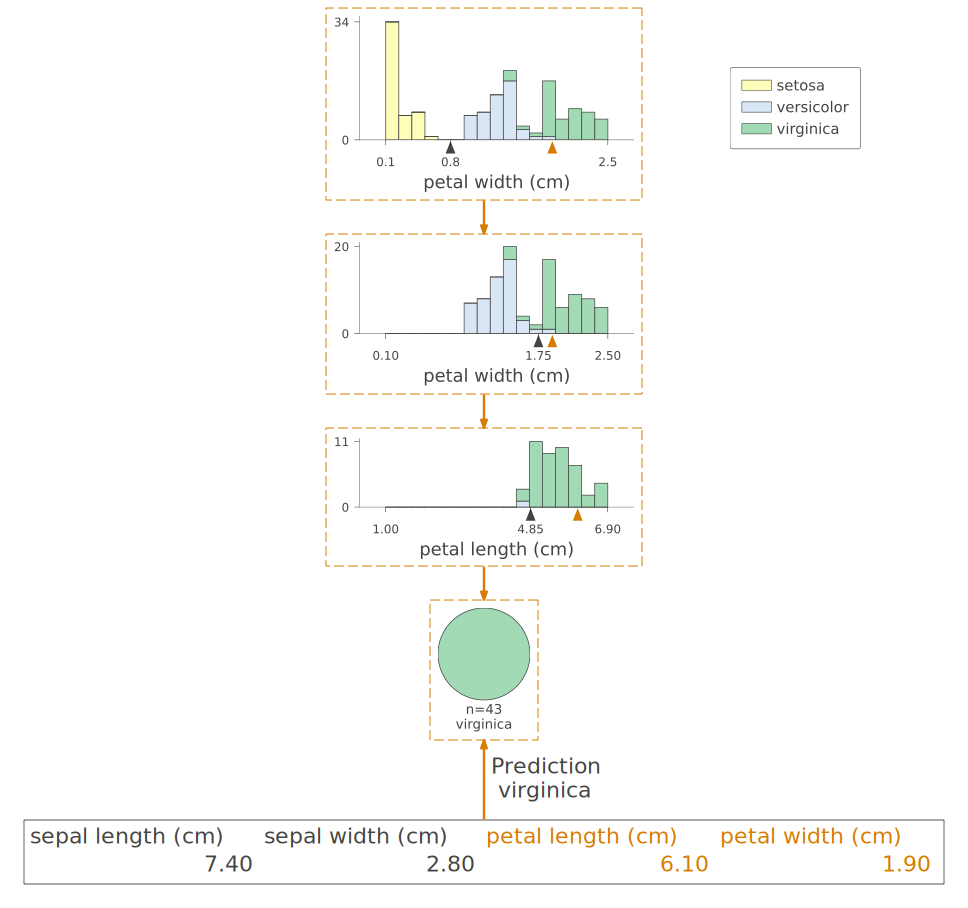

In [205]:
# Select a single instance for highlighting just the prediction path
X_instance = iris.data[np.random.randint(0, len(iris.data)),:]
m_6 = dtreeviz.model(clas,
                    X_train,
                    y_train,
                    feature_names=iris.feature_names,
                    class_names=list(iris.target_names))

# Visualize the tree and show only the prediction path for X_instance
viz_6 = m_6.view(x=X_instance, show_just_path=True, scale=2,fontname='DejaVu Sans')
viz_6

# **8.Prediction Path in Plain english**

In [209]:


# Explain the prediction path for the single instance in plain English
print(dtreeviz.explain_prediction_path(clas, X_instance, feature_names = iris.feature_names, explanation_type='plain_english'))

4.85 <= petal length (cm) 
1.75 <= petal width (cm) 



# **9.Feature Importance**

None


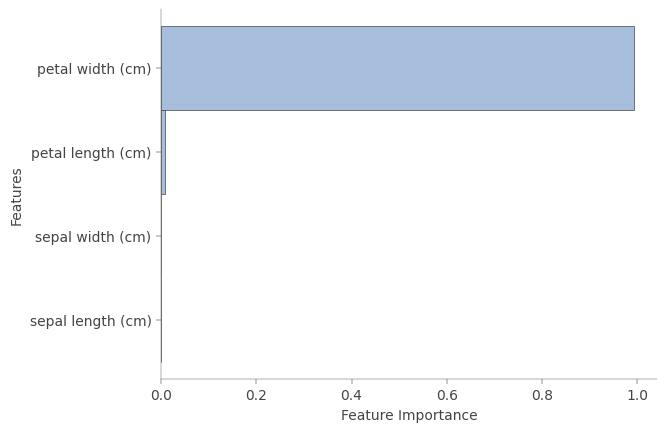

In [210]:


# Explain the prediction path for the single instance using sklearn default explanation
print(dtreeviz.explain_prediction_path(clas, X_instance, feature_names = iris.feature_names, explanation_type='sklearn_default'))

# **10. Univariate Regression**